In [1]:
pip install --upgrade tensorflow


  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [1]:
pip install pydot

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

DATADIR = r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Training"
CATEGORIES = ["glioma","meningioma","notumor","pituitary"]

In [2]:
import plotly.express as px
classes_info = {}
classes = sorted(os.listdir(DATADIR))
for name in classes:
    classes_info[name] = len(os.listdir(DATADIR + f'/{name}'))
print(classes_info)
fig = px.pie(names=classes_info.keys(),values=classes_info.values(),hole=0.05,title='CLasses Info')
fig.update_layout({'title':{"x":0.1}})
fig.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Uponika Barman Roy\\Desktop\\Semester1\\DA Projects\\group-Project\\data\\Training'

### Training Data Preparation

In [3]:
glimoa_train = os.listdir(r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Training\glioma")
men_train =  os.listdir(r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Training\meningioma")
notumor_train = os.listdir(r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Training\notumor")
pit_train =  os.listdir(r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Training\pituitary")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Uponika Barman Roy\\Desktop\\Semester1\\DA Projects\\group-Project\\data\\Training\\glioma'

<AxesSubplot:>

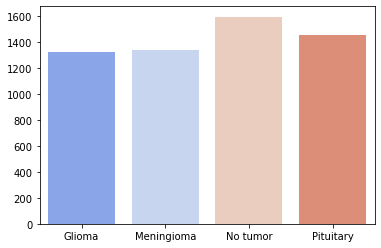

In [4]:
labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
values = [len(glimoa_train), len(men_train), len(notumor_train), len(pit_train)]
sns.barplot(x = labels, y = values, palette="coolwarm")

In [5]:
IMG_SIZE = 150
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)

(5712, 150, 150)


In [7]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y = to_categorical(y, num_classes = 4)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.1, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (5140, 150, 150, 1)
x_test shape (572, 150, 150, 1)
y_train shape (5140, 4)
y_test shape (572, 4)


### Test Data Preparation

<AxesSubplot:>

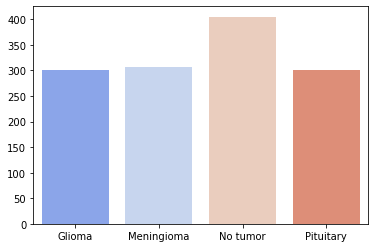

In [9]:
testDir = r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Testing"
testCategories = ["glioma","meningioma","notumor","pituitary"]
glimoa_test = os.listdir(r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Testing\glioma")
men_test =  os.listdir(r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Testing\meningioma")
notumor_test = os.listdir(r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Testing\notumor")
pit_test =  os.listdir(r"C:\Users\Uponika Barman Roy\Desktop\Semester1\DA Projects\group-Project\data\Testing\pituitary")
test_labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
test_values = [len(glimoa_test), len(men_test), len(notumor_test), len(pit_test)]
sns.barplot(x = test_labels, y = test_values, palette="coolwarm")

In [10]:
test_classes_info = {}
classes = sorted(os.listdir(testDir))
for name in classes:
    test_classes_info[name] = len(os.listdir(testDir + f'/{name}'))
print(test_classes_info)
fig = px.pie(names=test_classes_info.keys(),values=test_classes_info.values(),hole=0.05,title='Test CLasses Info')
fig.update_layout({'title':{"x":0.1}})
fig.show()

{'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}


In [11]:
IMG_SIZE = 150
testing_data = []

def create_testing_data():
    for category in testCategories:
        path = os.path.join(testDir,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()


In [12]:
X_test = []
y_test = []
for features_test,test_labels in testing_data:
    X_test.append(features_test)
    y_test.append(test_labels)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,150,150,1)

y_test = to_categorical(y_test, num_classes = 4)
Y_test = np.argmax(y_test,axis=1)

(1311, 150, 150)


### Importing Necessary libraries for model preparation

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow import keras
import tensorflow as tf
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop ,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Activation
from sklearn.metrics import classification_report

### Base Model

In [29]:
model1 =Sequential()
#4convolution layers and 2 maxpoollayer
model1.add(Conv2D(filters=32,kernel_size=5,input_shape=(150,150,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(filters=32,kernel_size=4,input_shape=(150,150,1)))
model1.add(Activation('relu'))

model1.add(MaxPool2D(pool_size=3))

model1.add(Conv2D(filters=25,kernel_size=3,input_shape=(100,100,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(filters=25,kernel_size=2,input_shape=(50,50,3)))
model1.add(Activation('relu'))

model1.add(MaxPool2D(pool_size=3))
#flatten layer
model1.add(Flatten())
#Deeeper hidden layer
model1.add(Dense(250))
model1.add(Activation('relu'))
#output layer
model1.add(Dense(4))
model1.add(Activation('softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs= 5

In [30]:
history1 = model1.fit(X_train,Y_train,epochs=epochs,validation_data=(X_val,Y_val))

Epoch 1/5
161/161 [==============================] - 155s 960ms/step - loss: 0.7093 - accuracy: 0.7148 - val_loss: 0.4197 - val_accuracy: 0.8357
Epoch 2/5
161/161 [==============================] - 162s 1s/step - loss: 0.3899 - accuracy: 0.8570 - val_loss: 0.3619 - val_accuracy: 0.8497
Epoch 3/5
161/161 [==============================] - 166s 1s/step - loss: 0.2895 - accuracy: 0.8887 - val_loss: 0.2906 - val_accuracy: 0.8934
Epoch 4/5
161/161 [==============================] - 155s 963ms/step - loss: 0.2037 - accuracy: 0.9241 - val_loss: 0.2287 - val_accuracy: 0.9143
Epoch 5/5
161/161 [==============================] - 153s 950ms/step - loss: 0.1519 - accuracy: 0.9416 - val_loss: 0.2124 - val_accuracy: 0.9143


In [7]:
model1.summary()

NameError: name 'model1' is not defined

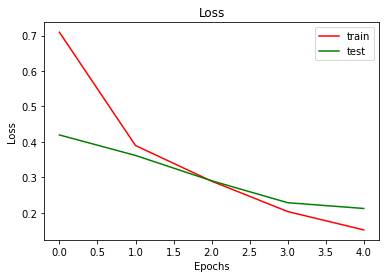

In [32]:
plt.plot(history1.history["loss"],c = "red")
plt.plot(history1.history["val_loss"],c = "green")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

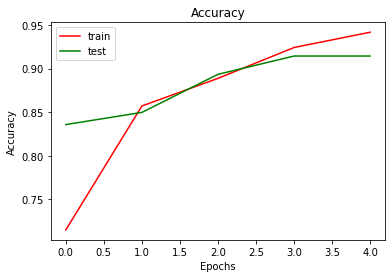

In [33]:
plt.plot(history1.history["accuracy"],c = "red")
plt.plot(history1.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [34]:
model1.save('brain_tumor1.h5')

In [35]:
predict_x_test1 =model1.predict(X_test) 
classes_x_test1 =np.argmax(predict_x_test1,axis=1)
classes_x_test1

41/41 [==============================] - 5s 114ms/step


array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [36]:
print(classification_report(Y_test,classes_x_test1,target_names=classes))

              precision    recall  f1-score   support

      glioma       0.93      0.86      0.89       300
  meningioma       0.85      0.84      0.85       306
     notumor       0.97      0.98      0.97       405
   pituitary       0.93      0.99      0.96       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.92      0.92      0.92      1311



Confusion Matrix


Text(70.8, 0.5, 'Predicted class')

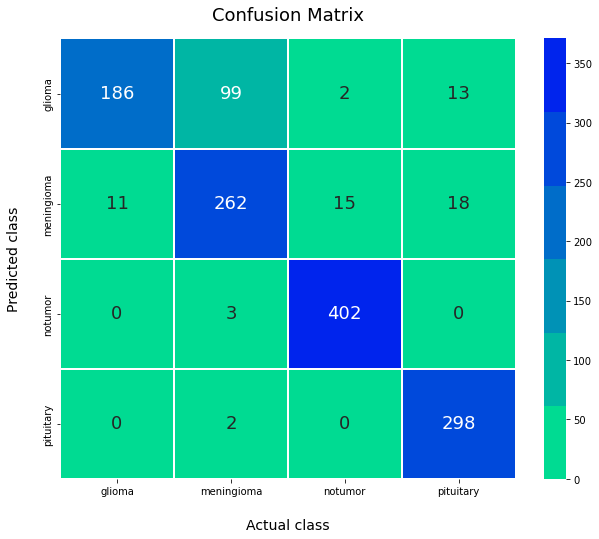

In [129]:
print('Confusion Matrix')
cm = confusion_matrix(Y_test, classes_x_test1)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

### Tuning 1

An early stopping concept is used for epoch 10 which is increased from the base model where epoch was 5

In [18]:
model2 =Sequential()
#4convolution layers and 2 maxpoollayer
model2.add(Conv2D(filters=32,kernel_size=5,input_shape=(150,150,1)))
model2.add(Activation('relu'))

model2.add(Conv2D(filters=32,kernel_size=4,input_shape=(150,150,1)))
model2.add(Activation('relu'))

model2.add(MaxPool2D(pool_size=3))

model2.add(Conv2D(filters=25,kernel_size=3,input_shape=(100,100,1)))
model2.add(Activation('relu'))

model2.add(Conv2D(filters=25,kernel_size=2,input_shape=(50,50,3)))
model2.add(Activation('relu'))

model2.add(MaxPool2D(pool_size=3))
#flatten layer
model2.add(Flatten())
#Deeeper hidden layer
model2.add(Dense(250))
model2.add(Activation('relu'))
#output layer
model2.add(Dense(4))
model2.add(Activation('softmax'))
model2.compile(optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999),loss='categorical_crossentropy',metrics=['accuracy'])
epochs= 10

In [19]:
from keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [20]:
history2 = model2.fit(X_train,Y_train,epochs=epochs,validation_data=(X_val,Y_val),callbacks=[early_stop])

Epoch 1/10
161/161 [==============================] - 157s 970ms/step - loss: 0.6838 - accuracy: 0.7163 - val_loss: 0.4118 - val_accuracy: 0.8654
Epoch 2/10
161/161 [==============================] - 162s 1s/step - loss: 0.3872 - accuracy: 0.8531 - val_loss: 0.3071 - val_accuracy: 0.9021
Epoch 3/10
161/161 [==============================] - 158s 981ms/step - loss: 0.2464 - accuracy: 0.9099 - val_loss: 0.2625 - val_accuracy: 0.9108
Epoch 4/10
161/161 [==============================] - 156s 967ms/step - loss: 0.1630 - accuracy: 0.9411 - val_loss: 0.2717 - val_accuracy: 0.9143
Epoch 5/10
161/161 [==============================] - 156s 970ms/step - loss: 0.1005 - accuracy: 0.9642 - val_loss: 0.2445 - val_accuracy: 0.9301
Epoch 6/10
161/161 [==============================] - 156s 967ms/step - loss: 0.0790 - accuracy: 0.9724 - val_loss: 0.2526 - val_accuracy: 0.9336
Epoch 7/10
161/161 [==============================] - 153s 948ms/step - loss: 0.0676 - accuracy: 0.9778 - val_loss: 0.2453 - va

In [21]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 146, 146, 32)      832       
                                                                 
 activation_12 (Activation)  (None, 146, 146, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 143, 143, 32)      16416     
                                                                 
 activation_13 (Activation)  (None, 143, 143, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 25)        7225      
                                                      

In [22]:
model2.save('brain_tumor2-with_LR.h5')

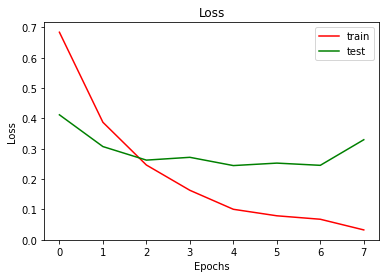

In [24]:
plt.plot(history2.history["loss"],c = "red")
plt.plot(history2.history["val_loss"],c = "green")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

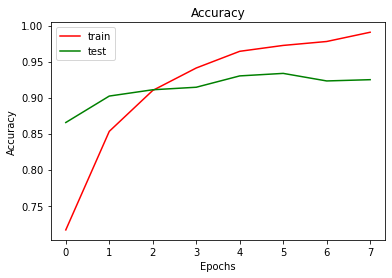

In [25]:
plt.plot(history2.history["accuracy"],c = "red")
plt.plot(history2.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [26]:
predict_x_test2 =model2.predict(X_test) 
classes_x_test2 =np.argmax(predict_x_test2,axis=1)
classes_x_test2

41/41 [==============================] - 5s 123ms/step


array([2, 0, 0, ..., 3, 3, 3], dtype=int64)

In [27]:
print(classification_report(Y_test,classes_x_test2,target_names=classes))

              precision    recall  f1-score   support

      glioma       1.00      0.78      0.87       300
  meningioma       0.81      0.96      0.88       306
     notumor       0.99      0.98      0.98       405
   pituitary       0.96      0.98      0.97       300

    accuracy                           0.93      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.93      0.93      1311



Confusion Matrix


Text(70.8, 0.5, 'Predicted class')

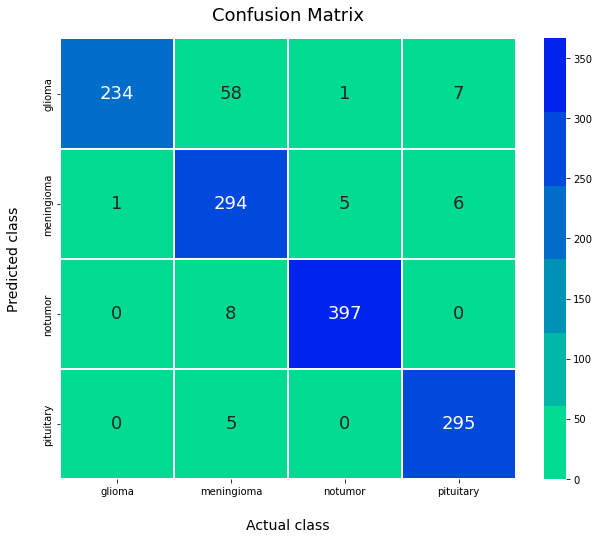

In [28]:
print('Confusion Matrix')
cm = confusion_matrix(Y_test, classes_x_test2)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

### Tuning 2

In the second tuning stage, the following strategies used are:
1. Modification in CNN topology with changed in number of filters, kernel size and batch size, activation layer to softmax
2. Addition of Hyperparameters- padding, strides
3. Addition of Dropout layers

In [111]:
model3 = Sequential()
#
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
#
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.25))

model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))
#
model3.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

#
model3.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

# 
model3.add(Flatten())
model3.add(Dense(1024, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 15 
batch_size = 40

In [112]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=False,  
        vertical_flip=False) 

In [113]:
datagen.fit(X_train)
history3 = model3.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size, callbacks=[early_stop]) 

Epoch 1/15
128/128 [==============================] - 131s 1s/step - loss: 0.9425 - accuracy: 0.5855 - val_loss: 0.8260 - val_accuracy: 0.6503
Epoch 2/15
128/128 [==============================] - 130s 1s/step - loss: 0.5695 - accuracy: 0.7773 - val_loss: 0.6827 - val_accuracy: 0.7220
Epoch 3/15
128/128 [==============================] - 132s 1s/step - loss: 0.4794 - accuracy: 0.8090 - val_loss: 0.5329 - val_accuracy: 0.7745
Epoch 4/15
128/128 [==============================] - 132s 1s/step - loss: 0.4050 - accuracy: 0.8500 - val_loss: 0.4311 - val_accuracy: 0.8322
Epoch 5/15
128/128 [==============================] - 133s 1s/step - loss: 0.3436 - accuracy: 0.8751 - val_loss: 0.4088 - val_accuracy: 0.8374
Epoch 6/15
128/128 [==============================] - 136s 1s/step - loss: 0.2925 - accuracy: 0.8890 - val_loss: 0.3219 - val_accuracy: 0.8776
Epoch 7/15
128/128 [==============================] - 136s 1s/step - loss: 0.2564 - accuracy: 0.9043 - val_loss: 0.2543 - val_accuracy: 0.8986

In [114]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 64)      1664      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 37, 37, 128)      

In [115]:
model3.save('brain_tumor3.h5')

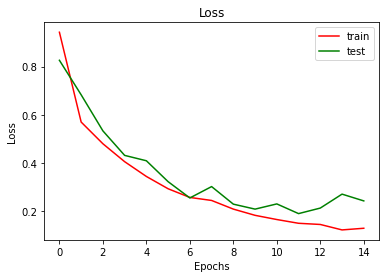

In [116]:
plt.plot(history3.history["loss"],c = "red")
plt.plot(history3.history["val_loss"],c = "green")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

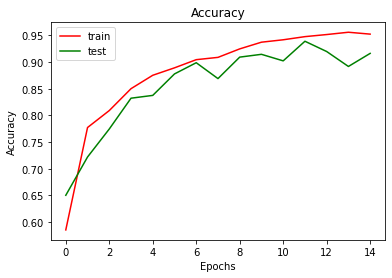

In [117]:
plt.plot(history3.history["accuracy"],c = "red")
plt.plot(history3.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [124]:
predict_x_test3 =model3.predict(X_test) 
classes_x_test3 =np.argmax(predict_x_test3,axis=1)
classes_x_test3

41/41 [==============================] - 7s 165ms/step


array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [125]:
print(classification_report(Y_test,classes_x_test3,target_names=classes))

              precision    recall  f1-score   support

      glioma       0.80      0.96      0.87       300
  meningioma       0.95      0.63      0.76       306
     notumor       0.94      0.99      0.97       405
   pituitary       0.92      0.99      0.95       300

    accuracy                           0.90      1311
   macro avg       0.90      0.89      0.89      1311
weighted avg       0.91      0.90      0.89      1311



Confusion Matrix


Text(70.8, 0.5, 'Predicted class')

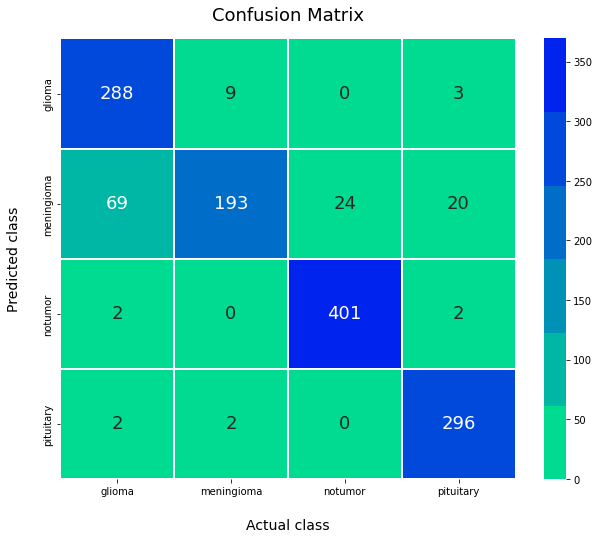

In [127]:
print('Confusion Matrix')
cm = confusion_matrix(Y_test, classes_x_test3)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

### For Tuning 3 refer the VGG model  -->